In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as ss
from scipy.stats import levene
import os
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
os.getcwd()

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


'/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-berezin-33/Statistics'

In [2]:
df_1 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-berezin-33/Statistics/5_task_1.csv', sep=',')
df_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-berezin-33/Statistics/5_task_2.csv', sep=',')

In [3]:
print(df_1.head(2))
print('-------------')
print(df_1.info())

      id group  events
0  16046     A      14
1  18712     A      41
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30000 non-null  int64 
 1   group   30000 non-null  object
 2   events  30000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 703.2+ KB
None


In [4]:
print(df_2.head(2))
print('-------------')
print(df_2.info())

      id group segment  events
0  83440  test    high    78.0
1  96723  test    high    71.0
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  int64  
 1   group    100000 non-null  object 
 2   segment  100000 non-null  object 
 3   events   100000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB
None


In [5]:
df_1.group.value_counts()

A    10000
C    10000
B    10000
Name: group, dtype: int64

In [6]:
df_2.group.value_counts()

test       50000
control    50000
Name: group, dtype: int64

### Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

In [7]:
df_1_gr_a = df_1.query('group == "A"')
df_1_gr_b = df_1.query('group == "B"')
df_1_gr_c = df_1.query('group == "C"')

In [8]:
a = df_1_gr_a.group
b = df_1_gr_b.group
c = df_1_gr_c.group

In [9]:
scipy.stats.levene(df_1_gr_a.id, df_1_gr_b.id, df_1_gr_c.id)

LeveneResult(statistic=0.05175792802263705, pvalue=0.9495587853748012)

In [10]:
pg.homoscedasticity(df_1, dv="id", group="group")

,W,pval,equal_var
levene,0.051758,0.949559,True


In [11]:
test_df_2 = df_2.query('group == "test"')
control_df_2 = df_2.query('group == "control"')

In [12]:
scipy.stats.levene(test_df_2.id, control_df_2.id)

LeveneResult(statistic=0.5131355523417127, pvalue=0.4737863136255498)

In [13]:
pg.homoscedasticity(df_2, dv="id", group="group")

,W,pval,equal_var
levene,0.513136,0.473786,True


### Убедитесь, что данные распределены нормально - тем же способом, что и в прошлом уроке.
Дополнительно: сравните  результат с qq-графиками. Какой вывод можно сделать по совокупности этих методов?
##### Ответ:
- Во всех группах имеем нормальное распределение данных.

#### Проверка на нормальность группы А.

In [14]:
scipy.stats.normaltest(df_1_gr_a.events)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


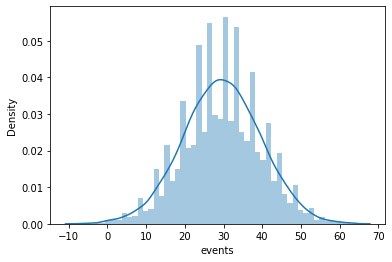

In [15]:
sns.distplot(df_1_gr_a.events, kde=True, bins=50)

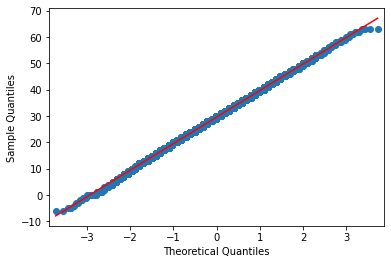

In [16]:
fig = sm.qqplot(df_1_gr_a.events, line='s')
plt.show()

#### Проверка на нормальность группы B.

In [17]:
scipy.stats.normaltest(df_1_gr_b.events)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


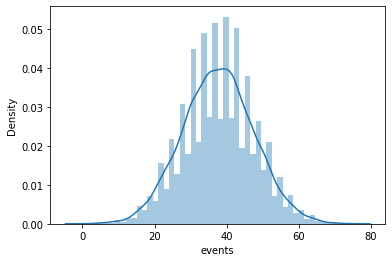

In [18]:
sns.distplot(df_1_gr_b.events, kde=True, bins=50)

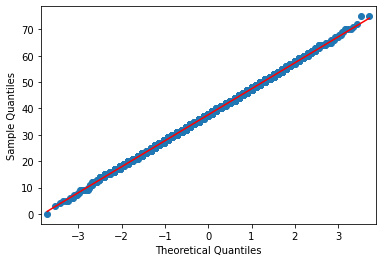

In [19]:
fig = sm.qqplot(df_1_gr_b.events, line='s')
plt.show()

#### Проверка на нормальность группы C.

In [20]:
scipy.stats.normaltest(df_1_gr_c.events)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


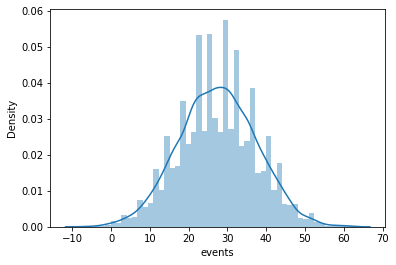

In [21]:
sns.distplot(df_1_gr_c.events, kde=True, bins=50)

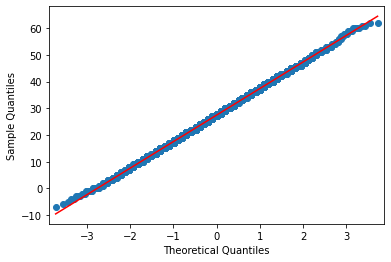

In [22]:
fig = sm.qqplot(df_1_gr_c.events, line='s')
plt.show()

### Проводим - ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ

In [23]:
scipy.stats.f_oneway(df_1_gr_a.events, df_1_gr_b.events, df_1_gr_c.events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

### Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

### Дополнительно: попробуйте другие варианты поправок на множественные сравнения через pingouin. 

#### Дают ли они те же выводы, что и Тьюки?

##### Ответ: 
- Исходя из проведенных тестов, можем сделать вывод что все группы значимо отличаются дург от друга.

In [24]:
# Делаем тест Тьюке через statmodels
sm.stats.multicomp.pairwise_tukeyhsd(endog=df_1.events, groups=df_1.group, alpha= 0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [25]:
# делаем тест Тьюке через пингвин
df_1.pairwise_tukey(dv='events', between='group').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.580,37.614,-8.034,0.141,-57.022,0.001,-0.806
1,A,C,29.580,27.470,2.109,0.141,14.971,0.001,0.212
2,B,C,37.614,27.470,10.143,0.141,71.992,0.001,1.018


### Bизуализируйте распределение events для контрольной и тестовой групп. 

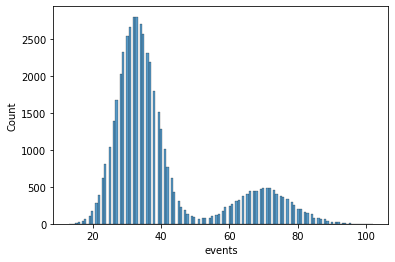

In [26]:
sns.histplot(data=test_df_2, x='events')

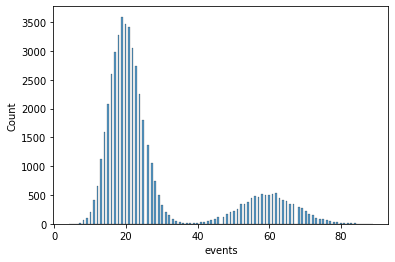

In [27]:
sns.histplot(data=control_df_2, x='events')

### Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

Расчет для тестовой группы

In [33]:
test_df_2.query('segment == "high"').agg({'events':['std', 'mean', 'median']})

,events
std,8.403974
mean,69.938500
median,70.000000


In [34]:
test_df_2.query('segment == "low"').agg({'events':['std', 'mean', 'median']})

,events
std,5.720845
mean,33.025925
median,33.000000


Расчет для контрольной группы

In [35]:
control_df_2.query('segment == "low"').agg({'events':['std', 'mean', 'median']})

,events
std,4.473576
mean,20.031575
median,20.000000


In [36]:
control_df_2.query('segment == "high"').agg({'events':['std', 'mean', 'median']})

,events
std,7.805347
mean,59.970800
median,60.000000


### Проведите тест, а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

In [47]:
model = smf.ols(formula='events ~ segment + group + segment:group', data=df_2).fit()
oav_tabel = sm.stats.anova_lm(model, typ=2)

In [48]:
oav_tabel

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [50]:
pg.anova(data=df_2, dv='events', between=["group", "segment"])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [52]:
df_2['combination'] = df_2.group + '\\' + df_2.segment

In [53]:
df_2['combination'] 

0          test\high
1          test\high
2          test\high
3          test\high
4          test\high
            ...     
99995    control\low
99996    control\low
99997    control\low
99998    control\low
99999    control\low
Name: combination, Length: 100000, dtype: object

In [55]:
df_2.pairwise_tukey(dv='events', between='combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control\high,control\low,59.970800,20.031575,39.939225,0.065432,610.391461,0.001,6.824282
1,control\high,test\high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.001,-1.703109
2,control\high,test\low,59.970800,33.025925,26.944875,0.065432,411.798717,0.001,4.603981
3,control\low,test\high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.001,-8.527429
4,control\low,test\low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.001,-2.220314
5,test\high,test\low,69.938500,33.025925,36.912575,0.065432,564.135148,0.001,6.307128


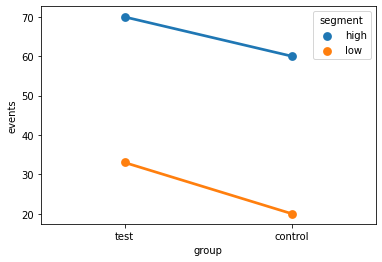

In [57]:
sns.pointplot(data=df_2, x="group", y="events", hue='segment')